In [38]:
import networkx as nx
import json
import nltk
import pandas as pd
import re
import matplotlib.pyplot as plt 
import gensim
import community
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

from gensim import corpora, models
from string import punctuation
from nltk.corpus import stopwords
from datetime import datetime
from textblob import TextBlob  
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer as Vectorizer
from nltk  import TweetTokenizer
from gensim.models import CoherenceModel 
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models import HdpModel

# import pyLDAvis
# import matplotlib.pyplot as plt
# nltk.download('stopwords')


In [39]:
#VARIABLES:
english_stopwords = stopwords.words('english')
data = []

#Variables para sentimentalAnalis()
popularidad_list = []
numeros_list = []
numero = 0 

#Variable for LDA AND HLDA
corpus = ""
elDictionary = ""
ldaResult = ""
modelLDA = ""
list_user_mentioned = dict()

In [42]:
def clean_data_from_json(file):
    # Load the first sheet of the JSON file into a data frame
    global user_mention, df, data
    df = pd.read_json(file, orient='columns')

    df.to_csv('DataFrame.csv',encoding="utf-8")
    #print (df)
    df = pd.read_csv('DataFrame.csv', encoding='utf-8')
    data = df['text'].tolist()
    

    return

In [68]:
def relaciones_network():
    graph=nx.Graph()
    global df
    content_entities = df['entities'].tolist()
    user_id = df['user'].tolist()
    for names, author in zip(content_entities, user_id):
        names = eval(names)['user_mentions']
        author = eval(str(author))['screen_name']
        for val in names:
            try:
                graph[author][val['screen_name']]["weight"]+=1
            except:
                graph.add_edge(author,val['screen_name'],weight=1)
        
    return graph



In [37]:
# Start 
print ("Sentimental Analysis Start:")
start('P1THEDEMOCRATS_2000.json')
#Tratamiento
for tt in data:
    sentimentalAnalis(tt)
print ("Done.")

Sentimental Analysis Start:
Done.


In [ ]:
#Dibujar grafica Sentimental
GraficarDatos(numeros_list,popularidad_list,numero)

In [69]:
graph = relaciones_network()

TypeError: 'NodeView' object does not support item assignment

In [ ]:
print(nx.attribute_assortativity_coefficient(graph,'sentimiento'))

In [54]:
r=nx.degree_assortativity_coefficient(graph)

d=nx.average_neighbor_degree(graph, source='in', target='in')

print(r)
print ('\n')
print (d)


-0.29354969660137303


{'daby0729': 527.6666666666666, 'nancyrutas': 3.0, 'RepAlGreen': 3.0, 'TheDemocrats': 3.302972802024035, 'deplorable_LS': 1581.0, 'NerdetteAngle': 1130.0, 'DickDurbin': 2.204712812960236, 'improv__nation': 1130.0, 'scottmcallstair': 1130.0, 'theurban_guru': 360.0, 'Jali_Cat': 29.464788732394368, 'realDonaldTrump': 4.906716417910448, 'HouseGOP': 6.7534246575342465, 'SenateGOP': 6.736111111111111, 'DNC': 6.421052631578948, 'sixbennetts': 648.0, 'GOP': 5.410526315789474, 'ScribbledPages1': 329.6666666666667, 'Westxgal': 39.01923076923077, 'ihvurbk2': 325.3333333333333, 'PhloatinDave': 337.0, 'JoeZwier': 5.0, 'sjshelton91': 5.0, 'UnitersCentrist': 337.0, 'larrylyons1946': 294.77777777777777, 'will_melnick': 380.3333333333333, 'MileHiCityGal': 794.5, 'JoyAnnReid': 6.375, 'kearst75': 1130.0, '_AltDonaldTrump': 528.6666666666666, 'USATODAY': 3.0, 'GiantEagleOne': 1130.0, 'foreverlnbooks': 1130.0, 'bansheebabe': 212.75, 'politico': 8.333333333333334, 'LindseyGrahamSC': 1

In [36]:
a=nx.degree(graph)
print(a)

[('daby0729', 3), ('nancyrutas', 1), ('RepAlGreen', 1), ('TheDemocrats', 1581), ('deplorable_LS', 1), ('NerdetteAngle', 2), ('DickDurbin', 679), ('improv__nation', 2), ('scottmcallstair', 2), ('theurban_guru', 6), ('Jali_Cat', 71), ('realDonaldTrump', 268), ('HouseGOP', 73), ('SenateGOP', 72), ('DNC', 95), ('sixbennetts', 3), ('GOP', 95), ('ScribbledPages1', 6), ('Westxgal', 52), ('ihvurbk2', 6), ('PhloatinDave', 5), ('JoeZwier', 2), ('sjshelton91', 2), ('UnitersCentrist', 5), ('larrylyons1946', 9), ('will_melnick', 6), ('MileHiCityGal', 2), ('JoyAnnReid', 8), ('kearst75', 2), ('_AltDonaldTrump', 3), ('USATODAY', 1), ('GiantEagleOne', 2), ('foreverlnbooks', 2), ('bansheebabe', 8), ('politico', 3), ('LindseyGrahamSC', 9), ('nodak2nova', 2), ('alpinegoodtime', 2), ('fatbadgertweets', 6), ('CuriousMoosLamb', 7), ('POTUS', 54), ('foxandfriends', 6), ('ETMcCurry', 1), ('StauroliteIce', 8), ('Mydreadlocks', 11), ('usvetram', 19), ('gentlemanirishN', 14), ('RealCommander02', 9), ('LickTheGlic

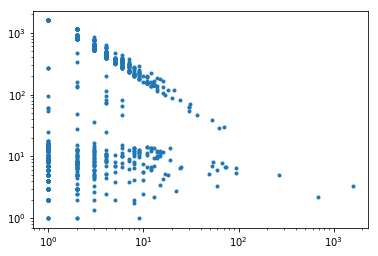

In [69]:
x = []
for lista, listb in a:
    x.append(listb)

    
y = d.values()

    
#x = a.values()
#y = d.values()

plt.loglog(x,y, '.')

plt.show()

FIN NETWORK X


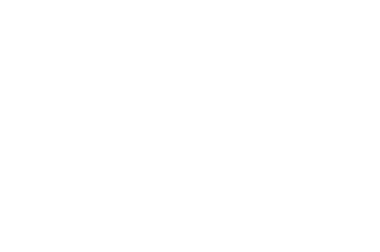

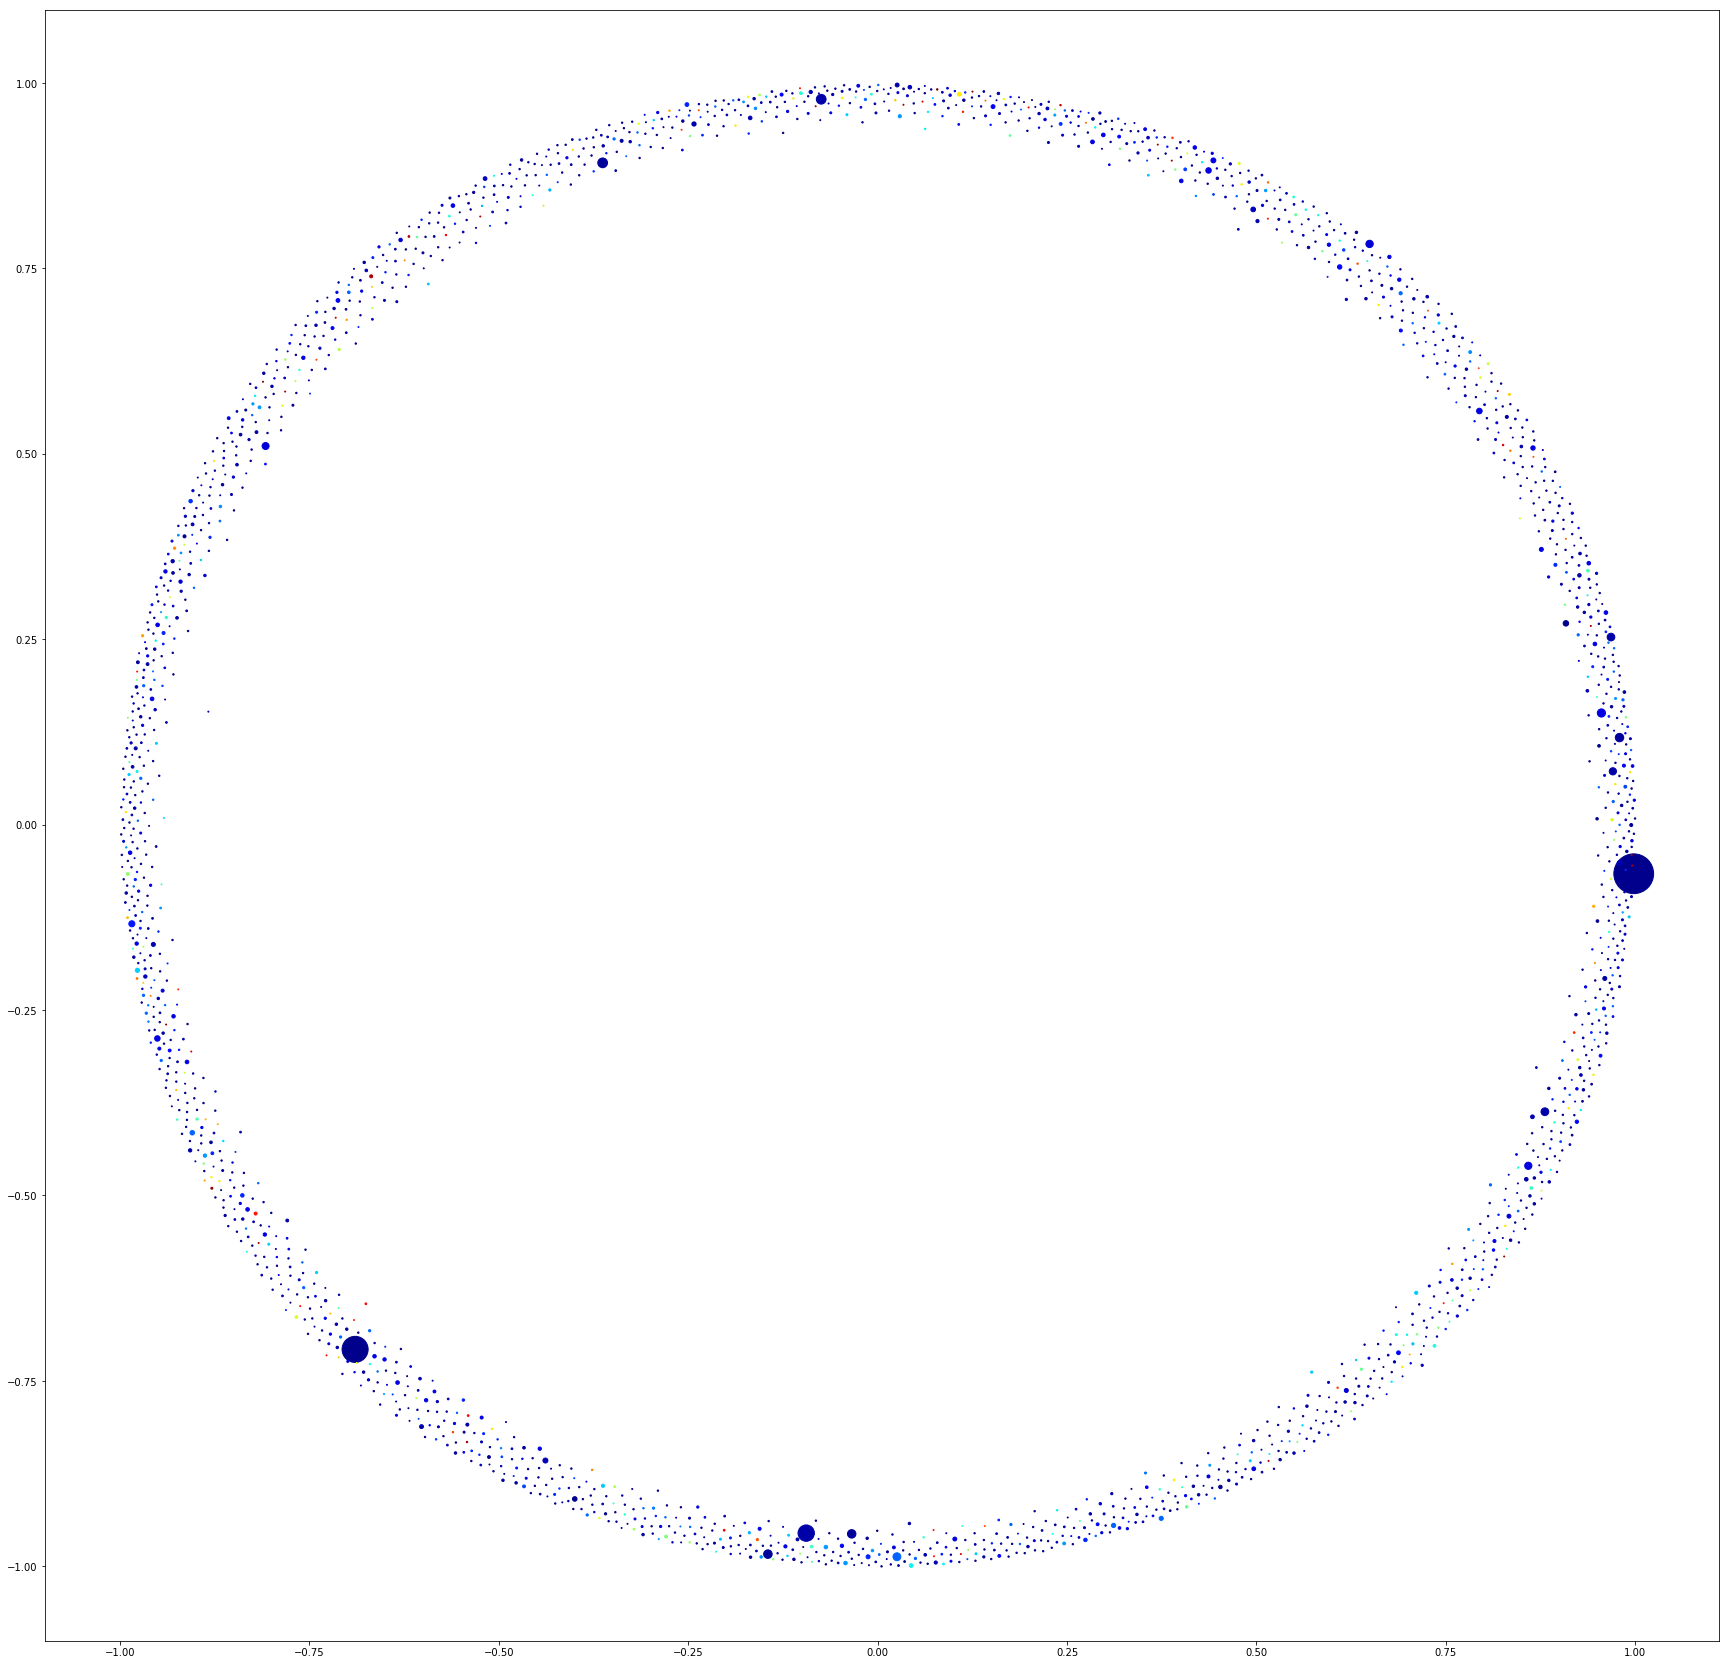

In [52]:

graph = graph.to_undirected()
spring_pos = nx.spring_layout(graph,k=100, iterations=150)
parts = community.best_partition(graph)
values = [parts.get(node) for node in graph.nodes()]
plt.axis("off")
plt.figure(figsize=(30,30))
size_node = [val for (node, val) in graph.degree()]
nx.draw_networkx(graph, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = size_node, with_labels = False, edge_color="white")
#nx.draw(graph)
#nx.write_graphml(graph,"networkX.graphml",prettyprint=True)
#plt.show()
print ("FIN NETWORK X")

In [12]:
#Segundo Analisis

In [10]:
print ("Comunity Analysis Start:")
start('P1THEDEMOCRATS_2000.json')
relaciones_network()


Comunity Analysis Start:
      Unnamed: 0                       _id          coordinates  \
0              0  5a5902b33b29c3bbcfe12224  {'coordinates': {}}   
1              1  5a5902b33b29c3bbcfe12254  {'coordinates': {}}   
2              2  5a5902b33b29c3bbcfe1223d  {'coordinates': {}}   
3              3  5a5902b33b29c3bbcfe1223f  {'coordinates': {}}   
4              4  5a5902b33b29c3bbcfe12241  {'coordinates': {}}   
5              5  5a5902b33b29c3bbcfe12243  {'coordinates': {}}   
6              6  5a5902b33b29c3bbcfe12245  {'coordinates': {}}   
7              7  5a5902b33b29c3bbcfe12246  {'coordinates': {}}   
8              8  5a5902b33b29c3bbcfe12247  {'coordinates': {}}   
9              9  5a5902b33b29c3bbcfe12248  {'coordinates': {}}   
10            10  5a5902b33b29c3bbcfe12249  {'coordinates': {}}   
11            11  5a5902b33b29c3bbcfe1224a  {'coordinates': {}}   
12            12  5a5902b33b29c3bbcfe1224b  {'coordinates': {}}   
13            13  5a5902b33b29c3bbcfe

In [ ]:
##Primer Analisis

Graph Analysis Start:


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


FIN NETWORK X


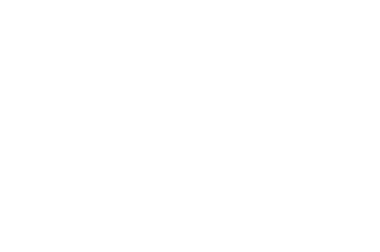

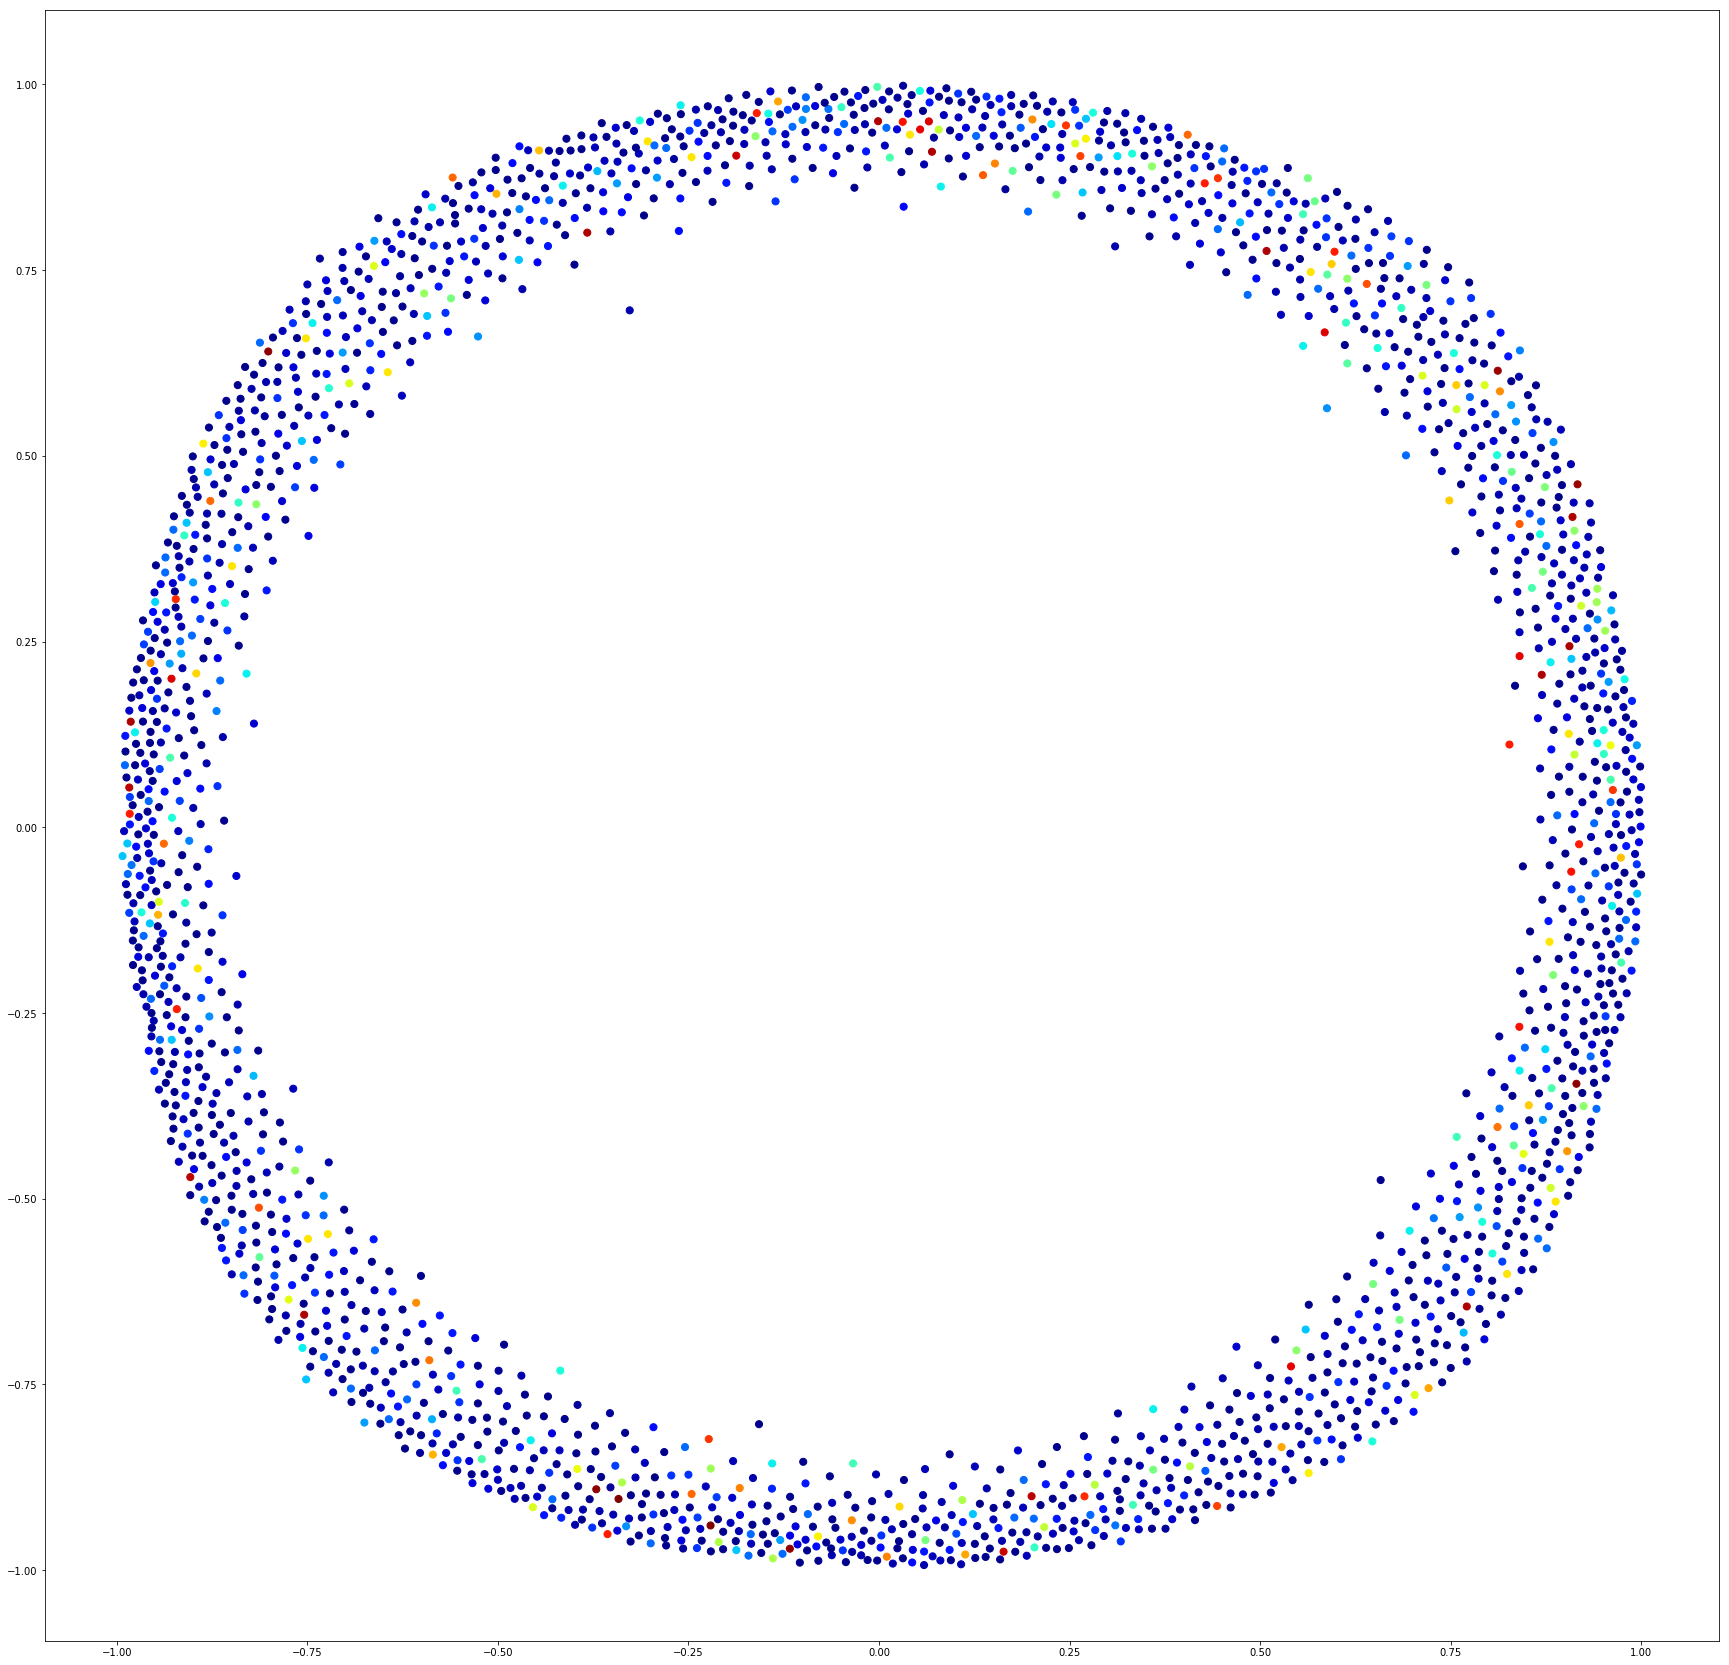

In [34]:
print ("Graph Analysis Start:")
start('P1THEDEMOCRATS_2000.json')
relaciones_network()


In [22]:
def tweet_clean(tweet):
    print('Original tweet:', tweet, '\n')
    tweet = str(tweet)
    # Remove HTML special entities (e.g. &amp;)
    tweet_no_special_entities = re.sub(r'\&\w*;', '', tweet)
    tweet_no_special_entities = re.sub(r'\@\w*;', '', tweet)
    #print('No special entitites:', tweet_no_special_entities, '\n')
    # Remove tickers
    tweet_no_tickers = re.sub(r'\$\w*', '', tweet_no_special_entities)
    #print('No tickers:', tweet_no_tickers, '\n')
    # Remove hyperlinks
    tweet_no_hyperlinks = re.sub(r'https?:\/\/.*\/\w*', '', tweet_no_tickers)
    #print('No hyperlinks:', tweet_no_hyperlinks, '\n')
    # Remove hashtags
    tweet_no_hashtags = re.sub(r'#\w*', '', tweet_no_hyperlinks)
    #print('No hashtags:', tweet_no_hashtags, '\n')
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet_no_punctuation = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet_no_hashtags)
    #print('No punctuation:', tweet_no_punctuation, '\n')
    # Remove https
    tweet_no_https = re.sub(r'https', '', tweet_no_punctuation)
    tweet_no_https = re.sub(r'http', '', tweet_no_punctuation)
    #print('No https:', tweet_no_https, '\n')
    # Remove words with 2 or fewer letters
    tweet_no_small_words = re.sub(r'\b\w{1,2}\b', '', tweet_no_https)
    #print('No small words:', tweet_no_small_words, '\n')
    # Remove whitespace (including new line characters)
    tweet_no_whitespace = re.sub(r'\s\s+', ' ', tweet_no_small_words) 
    tweet_no_whitespace = tweet_no_whitespace.lstrip(' ') # Remove single space remaining at the front of the tweet.
    #print('No whitespace:', tweet_no_whitespace, '\n')
	# Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    # tweet_no_emojis = ''.join(c for c in tweet_no_whitespace if c <= '\uFFFF') # Apart from emojis (plane 1), this also removes historic scripts and mathematical alphanumerics (also plane 1), ideographs (plane 2) and more.
    # #print('No emojis:', tweet_no_whitespace, '\n')
    # Tokenize: Change to lowercase, reduce length and remove handles
    tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True) # reduce_len changes, for example, waaaaaayyyy to waaayyy.
    tw_list = tknzr.tokenize(tweet_no_whitespace)
    #print('Tweet tokenize:', tw_list, '\n')
    # Remove stopwords
    list_no_stopwords = [i for i in tw_list if i not in english_stopwords]
    #print('No stop words:', list_no_stopwords, '\n')
    # 

    # Final filtered tweet
    tweet_filtered =' '.join(list_no_stopwords)

    print ('Final tweet: ', tweet_filtered)
    
    return(tweet_filtered)

In [63]:
def sentimentalAnalis(twitText):
    global numero, popularidad_list, numeros_list
    if numero <= 100:
        analisis = TextBlob(str(twitText))
        analisis = analisis.correct()
        popularidad = analisis.sentiment
        popularidad = popularidad.polarity
        popularidad_list.append(popularidad)
        numeros_list.append(numero)
        numero = numero + 1 
        return popularidad

In [24]:
def GraficarDatos(numeros_list,popularidad_list,numero):
    axes = plt.gca()
    axes.set_ylim([-1, 2]) 
    
    plt.scatter(numeros_list, popularidad_list)

    popularidadPromedio = (sum(popularidad_list))/(len(popularidad_list))
    popularidadPromedio = "{0:.0f}%".format(popularidadPromedio * 100)
    time  = datetime.now().strftime("")
    # time  = datetime.now().strftime("A : %H:%M\n El: %m-%d-%y")
    plt.text(0, 1.25, 
             "Sentimiento promedio:  " + str(popularidadPromedio) + "\n" + time, 
             fontsize=12, 
             bbox = dict(facecolor='none', 
                         edgecolor='black', 
                         boxstyle='square, pad = 1'))
    
    plt.title("Sentimientos sobre P1THEDEMOCRATS_2000 en twitter")
    plt.xlabel("Numero de tweets")
    plt.ylabel("Sentimiento")
    plt.show()

In [25]:
def ldaMethod(data,topics ):
    global corpus, elDictionary, ldaResult, modelLDA
    tokenizer = RegexpTokenizer(r'\w+')

    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()

    # list for tokenized twiits in loop
    palabras = []
    for i in data:
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(word) for word in tokens]
        
        # add tokens to list
        palabras.append(stemmed_tokens)
        # twit tokenizado en documento 
    elDictionary = corpora.Dictionary(palabras)

    #token en document-termino matriz
    corpus = [elDictionary.doc2bow(text) for text in palabras]
    
    # Generacion LDA
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topics, id2word = elDictionary, passes=20)
    modelLDA = ldamodel
    print ("LDA")
    ldaResult = ldamodel.print_topics(5)
    print (ldaResult)

    print ("PERPLEXITY")
    print (ldamodel.log_perplexity(corpus))

    coherence_model_lda = CoherenceModel(model=ldamodel, texts=palabras, dictionary=elDictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()

    print ("COHERENCE:" )
    print (coherence_lda)

In [28]:
def start(documento):
    clean_data_from_json(documento)
    
#    for val in stateDict:
#        clear_twit = tweet_clean(val)
#        data.append(clear_twit)

In [2]:
def hlda(corpus, eldictionary, topic, probably_words):
    hdp = HdpModel(corpus, eldictionary)
    topic_info = hdp.print_topics(num_topics=20, num_words=10)
    print (topic_info)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[0.2857142857142857, -0.325, 0.0, 0.0, 0.0, 0.1, 0.0, -0.3125, -0.7, 0.0, 0.0, 0.0, 0.0, 0.0972222222222222, 0.0, 0.0, 0.0, -0.05, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, -0.1875, 0.0, 0.0, 0.24166666666666667, -0.3416666666666666, -0.11883116883116884, 0.45, 0.0, -0.1, 0.16666666666666666, -0.11883116883116884, 0.5681818181818181, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, -0.3125, 0.0, 0.0, -0.11883116883116884, 0.2916666666666667, -0.5, -0.1, 0.0, -0.3125, 0.4166666666666667, 0.5416666666666667, 0.0, 0.2, 0.6103515625, 0.0, -0.0625, 0.5, 0.0, 0.0, 0.6103515625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.34166

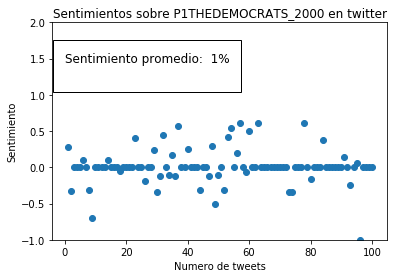

In [27]:
# LDA
print ("LDA START:")
#ldaMethod(Twits , Numero de Opics)
ldaMethod(data, 10)
print ("LDA DONE:")

LDA START:
LDA
[(3, '0.050*"keep" + 0.048*"protect" + 0.047*"question" + 0.047*"statu" + 0.047*"fight" + 0.046*"temporari" + 0.045*"common" + 0.044*"sens" + 0.044*"return" + 0.011*"amp"'), (0, '0.039*"alway" + 0.035*"point" + 0.020*"money" + 0.019*"countri" + 0.017*"lie" + 0.016*"need" + 0.016*"vote" + 0.014*"democrat" + 0.014*"lose" + 0.013*"come"'), (8, '0.035*"make" + 0.028*"trump" + 0.023*"america" + 0.021*"presid" + 0.020*"peopl" + 0.019*"great" + 0.018*"obama" + 0.017*"call" + 0.017*"busi" + 0.016*"republican"'), (6, '0.039*"meet" + 0.037*"hold" + 0.037*"immigr" + 0.037*"amp" + 0.036*"everi" + 0.036*"usa" + 0.035*"way" + 0.034*"singl" + 0.033*"live" + 0.032*"air"'), (1, '0.063*"get" + 0.057*"want" + 0.048*"call" + 0.046*"back" + 0.043*"deport" + 0.043*"alien" + 0.043*"mad" + 0.020*"racist" + 0.014*"right" + 0.010*"vote"')]
PERPLEXITY
-4.916033647005732
COHERENCE:
0.3281813761692616
LDA DONE:


In [28]:
# HLDA
print ("HLDA START:")
# def hlda(token en document-termino matriz, dictionary(seed), num_topics, most_probably_words):
hlda(corpus, elDictionary, 10, 50)
print ("HLDA DONE:")


HLDA START:
[(0, '0.023*senat + 0.023*racist + 0.023*talk + 0.022*trump + 0.022*use + 0.022*donald + 0.022*three + 0.022*languag + 0.021*yesterday + 0.021*hate'), (1, '0.004*tight + 0.004*thin + 0.004*almost + 0.004*truth + 0.004*protest + 0.003*meant + 0.003*eco + 0.003*pre + 0.003*trade + 0.003*kept'), (2, '0.007*solut + 0.004*verbatim + 0.004*blind + 0.003*chicago + 0.003*explain + 0.003*howev + 0.003*cannot + 0.003*facebook + 0.003*convinc + 0.003*argu'), (3, '0.005*supremacist + 0.004*med + 0.004*undermin + 0.004*chamber + 0.004*openli + 0.004*467 + 0.003*rep + 0.003*target + 0.003*lead + 0.003*els'), (4, '0.006*fascist + 0.004*footag + 0.004*past + 0.004*shorter + 0.004*congression + 0.004*full + 0.003*recal + 0.003*includ + 0.003*polit + 0.003*accord'), (5, '0.005*probl + 0.004*studio + 0.004*event + 0.004*short + 0.003*system + 0.003*100 + 0.003*major + 0.003*excus + 0.003*health + 0.003*abandon'), (6, '0.005*unifi + 0.004*word + 0.004*mua + 0.004*orang + 0.003*best + 0.003*zon

In [7]:
def graficModeLDA():
    probabilidad_del_topic = []
    print (ldaResult)
    for key,val in ldaResult:
        val = re.findall(r'\d*\.\d*',val)
        val = [i.encode('ascii', 'ignore') for i in val]
        a = 0
        for i in val:
            a+=float(i)

        probabilidad_del_topic.append((key,a))

    print (probabilidad_del_topic)
    d = elDictionary
    c = corpus
    lda = modelLDA
    data = pyLDAvis.gensim.prepare(lda, c, d)
    data
    
graficModeLDA